In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [46]:
titanic_data = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId')
titanic_test = pd.read_csv('../input/titanic/test.csv', index_col='PassengerId')
titanic_Ytest = pd.read_csv('../input/titanic/gender_submission.csv', index_col='PassengerId')
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic_test['Survived']=2
titanic= pd.concat([titanic_data,titanic_test])
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,2,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,2,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,2,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


0    549
1    342
2    418
Name: Survived, dtype: int64

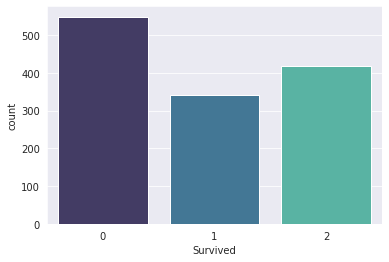

In [48]:
sns.countplot(data=titanic, x='Survived', palette='mako')
titanic.Survived.value_counts().sort_index()

In [49]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


In [50]:
titanic_na = (titanic.isna().sum()).to_frame(name='Train_na')
titanic_na

,Train_na
Survived,0
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,1014


Text(0.5, 1.0, 'count missing values')

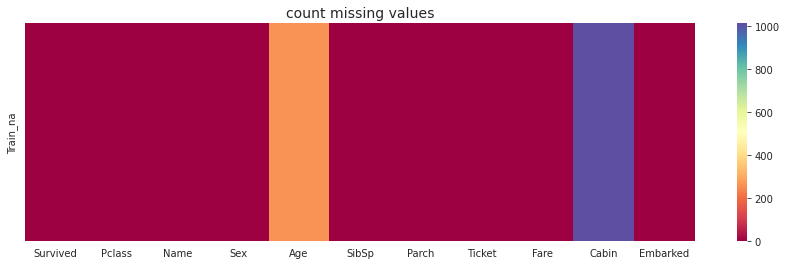

In [51]:
plt.figure(figsize=(15,4))
sns.heatmap(data=titanic_na.T,cmap='Spectral').set_title('count missing values', fontsize=14)

In [52]:
titanic['NaCount'] = titanic.T.isna().sum()
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NaCount
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,2
1306,2,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
1307,2,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1


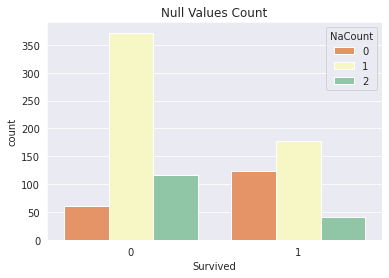

In [53]:
sns.countplot(data=titanic[titanic.Survived!=2], x='Survived', hue='NaCount',palette='Spectral').set_title('Null Values Count')
plt.show()

In [54]:
titanic[titanic.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NaCount
PassengerId,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [55]:
titanic.Embarked.fillna(titanic.Embarked.mode()[0],inplace=True)
titanic.drop(columns='Cabin', axis=1, inplace=True)
titanic.Embarked = titanic['Embarked'].astype('category')

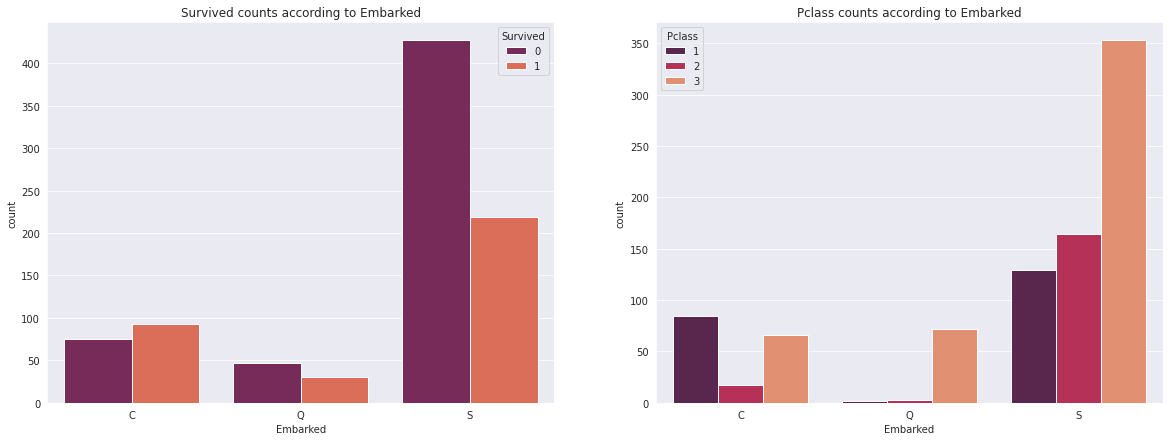

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,7))
sns.countplot(data=titanic[titanic.Survived!=2] ,x='Embarked', hue='Survived', palette='rocket', ax=ax[0]).set_title('Survived counts according to Embarked')
sns.countplot(data=titanic[titanic.Survived!=2] ,x='Embarked', hue='Pclass', palette='rocket', ax=ax[1]).set_title('Pclass counts according to Embarked')
plt.show()

In [57]:
titanic['Prefix'] = titanic.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
titles = titanic.Prefix.value_counts().to_frame()
titles.reset_index(inplace=True)
titles.columns=['Prefix','Nums']
titles.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Prefix,Mr,Miss,Mrs,Master,Rev,Dr,Col,Mlle,Major,Ms,Lady,Sir,Mme,Don,Capt,the Countess,Jonkheer,Dona
Nums,757,260,197,61,8,8,4,2,2,2,1,1,1,1,1,1,1,1


In [58]:
titanic[titanic.Prefix.isin(titles[titles.Nums<10]['Prefix'])].sort_values(by='Prefix')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NaCount,Prefix
PassengerId,,,,,,,,,,,,
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S,0,Capt
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,C,0,Col
1094,2,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C,0,Col
1023,2,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C,0,Col
695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,S,1,Col
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,1,Don
1306,2,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0,Dona
399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,1,Dr
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,0,Dr


In [59]:
Prefix_dict = {'Dr':'SPECIAL','Rev':'SPECIAL','Major':'SPECIAL','Col':'SPECIAL','Capt':'SPECIAL','Mlle':'ELITE',
               'the Countess':'ELITE', 'Sir':'ELITE','Lady':'ELITE','Don':'ELITE','Jonkheer':'ELITE','Dona':'ELITE',
               'Master':'MASTER', 'Miss':'MISS', 'Ms':'MISS', 'Mr':'MR','Mrs':'MRS','Mme':'MRS'}
titanic['Prefix'] = titanic['Prefix'].apply(lambda x: Prefix_dict[x])
titanic.drop(columns=['Name'], inplace=True)
titanic.Prefix = titanic.Prefix.astype('category')
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NaCount,Prefix
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,MR
2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,MRS
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,MISS
4,1,1,female,35.0,1,0,113803,53.1000,S,0,MRS
5,0,3,male,35.0,0,0,373450,8.0500,S,1,MR
6,0,3,male,NaN,0,0,330877,8.4583,Q,2,MR
7,0,1,male,54.0,0,0,17463,51.8625,S,0,MR
8,0,3,male,2.0,3,1,349909,21.0750,S,1,MASTER
9,1,3,female,27.0,0,2,347742,11.1333,S,1,MRS


In [60]:
titanic.Prefix.value_counts()

MR         757
MISS       262
MRS        198
MASTER      61
SPECIAL     23
ELITE        8
Name: Prefix, dtype: int64

In [61]:
prefix_pivot = pd.pivot_table(data= titanic, columns='Prefix', index='Pclass', values= ['Survived'], aggfunc=['count'])
prefix_pivot

count                             
       Survived                             
Prefix    ELITE MASTER MISS   MR MRS SPECIAL
Pclass                                      
1             8      5   60  159  78      13
2             0     11   51  150  55      10
3             0     45  151  448  65       0

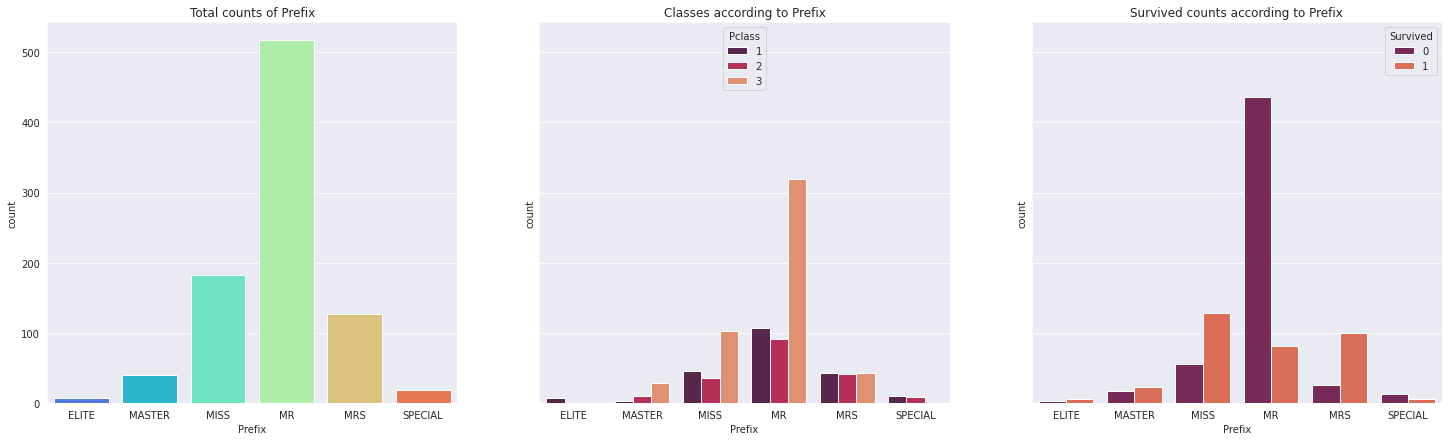

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(25,7), sharey=True)
sns.countplot(data=titanic[titanic.Survived!=2] ,x='Prefix' ,palette='rainbow',ax=ax[0]).set_title('Total counts of Prefix')
sns.countplot(data=titanic[titanic.Survived!=2] ,x='Prefix', hue='Pclass', palette='rocket', ax=ax[1]).set_title('Classes according to Prefix')
sns.countplot(data=titanic[titanic.Survived!=2] ,x='Prefix', hue='Survived', palette='rocket', ax=ax[2]).set_title('Survived counts according to Prefix')
plt.show()

In [63]:
titanic['Family'] = titanic.SibSp+titanic.Parch+1
titanic.drop(columns=['SibSp','Parch'], inplace=True)
titanic.Sex = titanic['Sex'].astype('category')
titanic.Sex = titanic.Sex.cat.codes
titanic

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,NaCount,Prefix,Family
PassengerId,,,,,,,,,,
1,0,3,1,22.0,A/5 21171,7.2500,S,1,MR,2
2,1,1,0,38.0,PC 17599,71.2833,C,0,MRS,2
3,1,3,0,26.0,STON/O2. 3101282,7.9250,S,1,MISS,1
4,1,1,0,35.0,113803,53.1000,S,0,MRS,2
5,0,3,1,35.0,373450,8.0500,S,1,MR,1
...,...,...,...,...,...,...,...,...,...,...
1305,2,3,1,NaN,A.5. 3236,8.0500,S,2,MR,1
1306,2,1,0,39.0,PC 17758,108.9000,C,0,ELITE,1
1307,2,3,1,38.5,SOTON/O.Q. 3101262,7.2500,S,1,MR,1


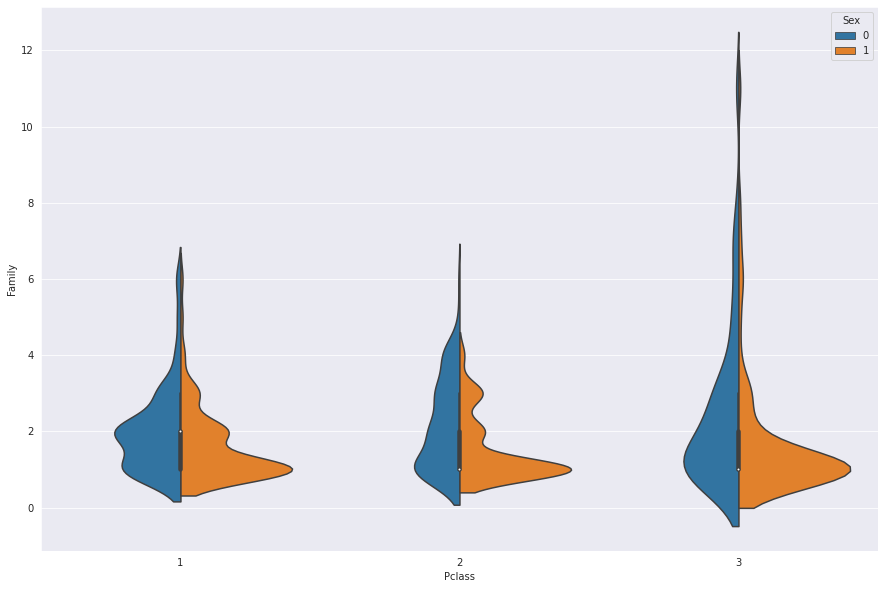

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
sns.violinplot(data=titanic, x='Pclass', y='Family', hue='Sex', split=True, figsize=(10,5))
plt.show()

## What about fare cost. is this value for each person or what?

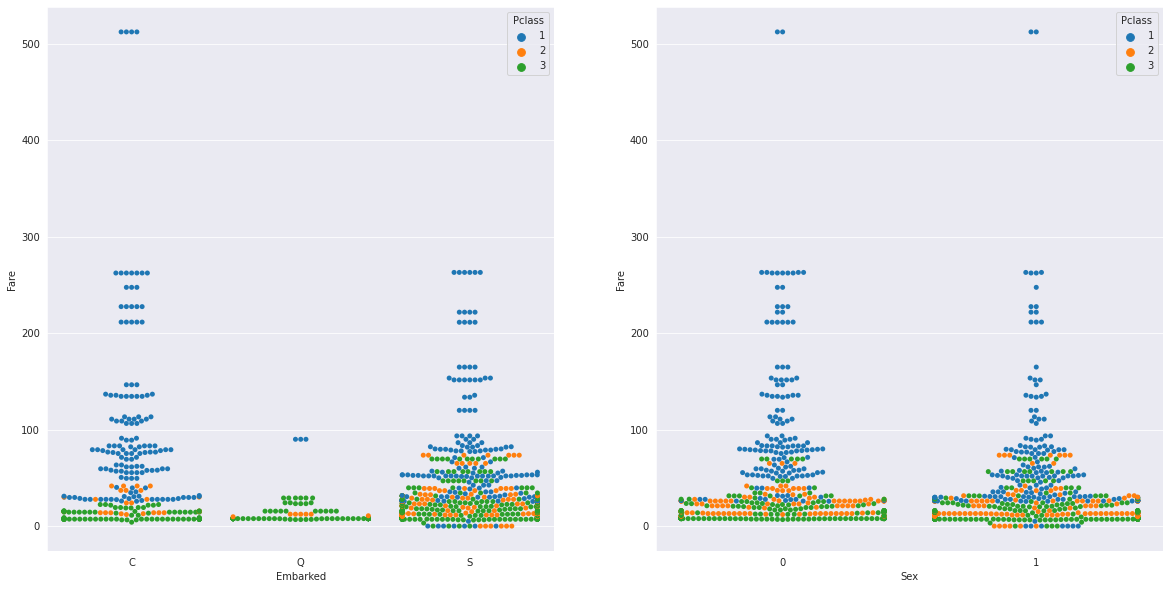

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
sns.swarmplot(data=titanic, x='Embarked', y='Fare', hue='Pclass', ax=ax[0])
sns.swarmplot(data=titanic, x='Sex', y='Fare', hue='Pclass', ax=ax[1])
plt.show()

In [66]:
maxFare = (titanic.groupby('Ticket')['Fare'].max()).to_frame(name='maxFare')
minFare = (titanic.groupby('Ticket')['Fare'].min()).to_frame(name='minFare')
tickets = pd.concat([maxFare,minFare], axis=1)
tickets[tickets.maxFare != tickets.minFare]

,maxFare,minFare
Ticket,,
3701,NaN,NaN
7534,9.8458,9.2167


In [67]:
titanic['TicketPersons'] = titanic.Ticket.apply(lambda x : titanic[titanic.Ticket== x].count()[0])
titanic['PersonFare'] = round(titanic.Fare/titanic.TicketPersons,2)

titanic.PersonFare.fillna(titanic[titanic.Pclass==3].PersonFare.mean(),inplace=True)
titanic.drop(columns=['Fare','Ticket'], inplace=True)
titanic

,Survived,Pclass,Sex,Age,Embarked,NaCount,Prefix,Family,TicketPersons,PersonFare
PassengerId,,,,,,,,,,
1,0,3,1,22.0,S,1,MR,2,1,7.25
2,1,1,0,38.0,C,0,MRS,2,2,35.64
3,1,3,0,26.0,S,1,MISS,1,1,7.92
4,1,1,0,35.0,S,0,MRS,2,2,26.55
5,0,3,1,35.0,S,1,MR,1,1,8.05
...,...,...,...,...,...,...,...,...,...,...
1305,2,3,1,NaN,S,2,MR,1,1,8.05
1306,2,1,0,39.0,C,0,ELITE,1,3,36.30
1307,2,3,1,38.5,S,1,MR,1,1,7.25


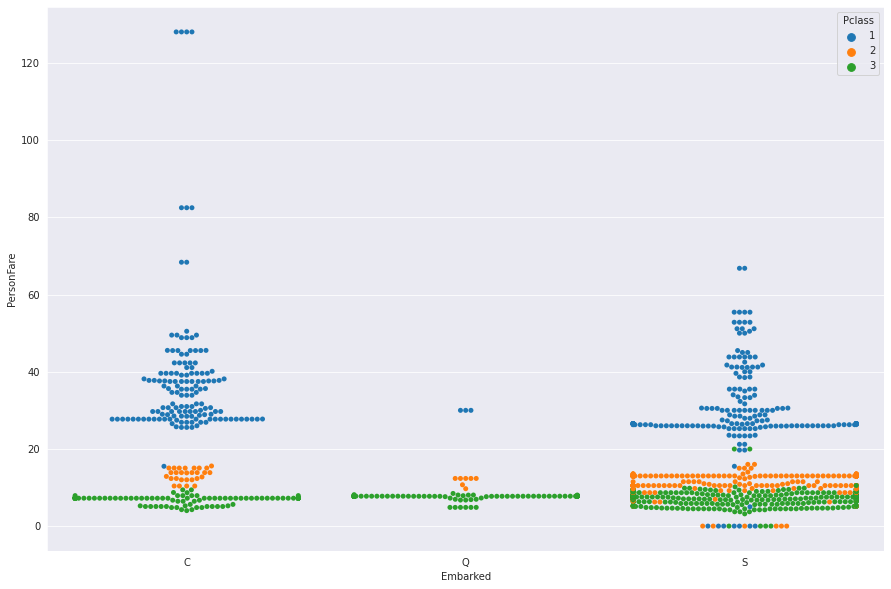

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,10))
sns.swarmplot(data=titanic, x='Embarked', y='PersonFare', hue='Pclass')
plt.show()

In [69]:
titanic[titanic.Family != titanic.TicketPersons]

,Survived,Pclass,Sex,Age,Embarked,NaCount,Prefix,Family,TicketPersons,PersonFare
PassengerId,,,,,,,,,,
1,0,3,1,22.0,S,1,MR,2,1,7.25
7,0,1,1,54.0,S,0,MR,1,2,25.93
21,0,2,1,35.0,S,1,MR,1,2,13.00
32,1,1,0,NaN,C,1,MRS,2,3,48.84
39,0,3,0,18.0,S,1,MISS,3,2,9.00
...,...,...,...,...,...,...,...,...,...,...
1296,2,1,1,43.0,C,0,MR,2,1,27.72
1298,2,2,1,23.0,S,1,MR,2,1,10.50
1299,2,1,1,50.0,C,0,MR,3,5,42.30


In [70]:
age_nulls = titanic[titanic.Age.isna()].groupby(['Prefix'])['Survived'].count()
age_nulls

Prefix
ELITE        0
MASTER       8
MISS        51
MR         176
MRS         27
SPECIAL      1
Name: Survived, dtype: int64

In [71]:
avg_age = dict(round(titanic.groupby(['Prefix'])['Age'].mean(),2))
avg_ageS = pd.Series(avg_age, name='AVG')
avg_ageS

ELITE      36.88
MASTER      5.48
MISS       21.80
MR         32.25
MRS        36.92
SPECIAL    46.27
Name: AVG, dtype: float64

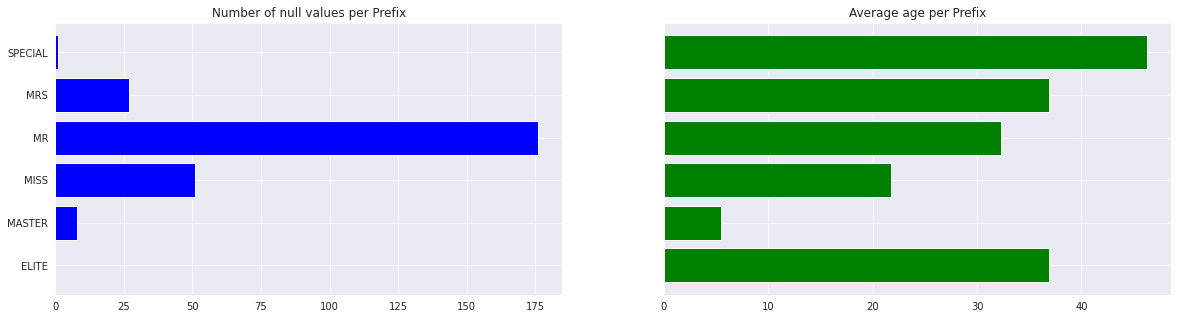

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharey=True, figsize= (20,5))
ax[0].barh(age_nulls.index, age_nulls, color='b')
ax[0].set_title('Number of null values per Prefix')
ax[1].barh(avg_ageS.index, avg_ageS, color='g')
ax[1].set_title('Average age per Prefix')
plt.show()

In [73]:
for i in avg_age:
    titanic['Age'].loc[(titanic.Prefix==i) & (titanic.Age.isna())]=avg_age[i]

In [74]:
titanic = pd.get_dummies(data=titanic, columns=['Embarked', 'Prefix'], drop_first=False)
titanic

,Survived,Pclass,Sex,Age,NaCount,Family,TicketPersons,PersonFare,Embarked_C,Embarked_Q,Embarked_S,Prefix_ELITE,Prefix_MASTER,Prefix_MISS,Prefix_MR,Prefix_MRS,Prefix_SPECIAL
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,1,22.00,1,2,1,7.25,0,0,1,0,0,0,1,0,0
2,1,1,0,38.00,0,2,2,35.64,1,0,0,0,0,0,0,1,0
3,1,3,0,26.00,1,1,1,7.92,0,0,1,0,0,1,0,0,0
4,1,1,0,35.00,0,2,2,26.55,0,0,1,0,0,0,0,1,0
5,0,3,1,35.00,1,1,1,8.05,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,3,1,32.25,2,1,1,8.05,0,0,1,0,0,0,1,0,0
1306,2,1,0,39.00,0,1,3,36.30,1,0,0,1,0,0,0,0,0
1307,2,3,1,38.50,1,1,1,7.25,0,0,1,0,0,0,1,0,0


In [75]:
titanic.describe()

,Survived,Pclass,Sex,Age,NaCount,Family,TicketPersons,PersonFare,Embarked_C,Embarked_Q,Embarked_S,Prefix_ELITE,Prefix_MASTER,Prefix_MISS,Prefix_MR,Prefix_MRS,Prefix_SPECIAL
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.899924,2.294882,0.644003,29.893369,0.977846,1.883881,2.101604,14.751894,0.206264,0.093965,0.699771,0.006112,0.046600,0.200153,0.578304,0.151261,0.017571
std,0.853975,0.837836,0.478997,13.196501,0.624645,1.583639,1.779832,13.551847,0.404777,0.291891,0.458533,0.077967,0.210862,0.400267,0.494019,0.358440,0.131435
min,0.000000,1.000000,0.000000,0.170000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.800000,1.000000,1.000000,1.000000,7.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,30.000000,1.000000,1.000000,1.000000,8.050000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,3.000000,1.000000,36.000000,1.000000,2.000000,3.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2.000000,3.000000,1.000000,80.000000,2.000000,11.000000,11.000000,128.080000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


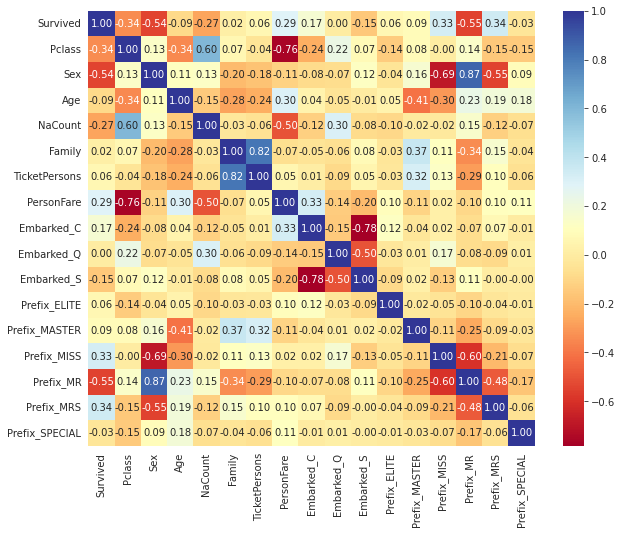

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(titanic[titanic.Survived!=2].corr(), cmap="RdYlBu", annot=True, fmt=".02f")
plt.show()

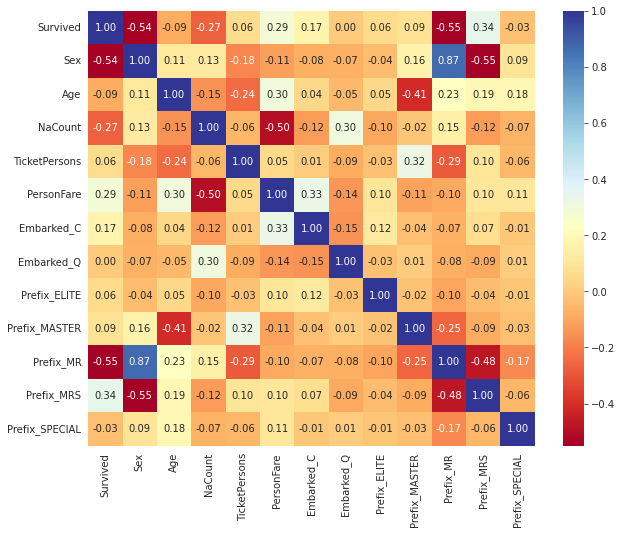

In [77]:
#Modification: Changing columns for dropping (drop columns with a strong correlation with other one
#and a weak correlation with target column

titanicdf = titanic.drop(columns=['Embarked_S', 'Prefix_MISS','Family','Pclass'])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(titanicdf[titanicdf.Survived!=2].corr(), cmap="RdYlBu", annot=True, fmt=".02f")
plt.show()

In [78]:
#dropping columns with weak correlation with target column (<0.09)
titanicdf = titanicdf.drop(columns=['Embarked_Q', 'Prefix_SPECIAL','TicketPersons','Prefix_ELITE', 'Prefix_MASTER'])

In [79]:
titanicX = titanicdf[titanicdf.Survived!=2]
titanicTest = titanicdf[titanicdf.Survived==2]
titanicY = titanicX.Survived
titanicX.drop(columns=['Survived'], inplace=True)
titanicTest.drop(columns=['Survived'], inplace=True)
# titanicX

In [80]:
titanicdf1 = titanicdf[titanicdf['Survived']!=2]
titanicdf1['PassengerId'] = titanicdf1.index
titanicdf1.head()

,Survived,Sex,Age,NaCount,PersonFare,Embarked_C,Prefix_MR,Prefix_MRS,PassengerId
PassengerId,,,,,,,,,
1,0,1,22.0,1,7.25,0,1,0,1
2,1,0,38.0,0,35.64,1,0,1,2
3,1,0,26.0,1,7.92,0,0,0,3
4,1,0,35.0,0,26.55,0,0,1,4
5,0,1,35.0,1,8.05,0,1,0,5


In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, MaxAbsScaler, PowerTransformer


scaler = PowerTransformer().fit(titanicX)
titanicX = scaler.transform(titanicX)
titanicTest = scaler.transform(titanicTest)

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
xtrain, xvalid, ytrain, yvalid = train_test_split(titanicX, titanicY, test_size=.3, shuffle=True, random_state=10)

In [83]:
titanicdf2 = titanicdf[titanicdf['Survived']==2]
titanicdf2['PassengerId'] = titanicdf2.index
titanicdf2.head()

,Survived,Sex,Age,NaCount,PersonFare,Embarked_C,Prefix_MR,Prefix_MRS,PassengerId
PassengerId,,,,,,,,,
892,2,1,34.5,1,7.83,0,1,0,892
893,2,0,47.0,1,7.00,0,0,1,893
894,2,1,62.0,1,9.69,0,1,0,894
895,2,1,27.0,1,8.66,0,1,0,895
896,2,0,22.0,1,6.14,0,0,1,896


In [84]:
from sklearn.ensemble import RandomForestClassifier
y = titanicdf1["Survived"]
features = ["Survived", "Sex", "Age", "NaCount", 'PersonFare', 'Embarked_C', 'Prefix_MR', 'Prefix_MRS']
X = titanicdf1
X_test = titanicdf2
model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [85]:
submitted = pd.read_csv('./submission.csv')
submitted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
